In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero

plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 3.0

warnings.filterwarnings('ignore')

rule_names = [ # Define labels for all rules to be run during simulations
    r'',
    r'$y$',
    r'$x$',
    r'$y^2$',
    # r'$x^2$',
    r'$x \, y$',
    r'$x \, y^2$',
    # r'$x^2 \, y$',
    # r'$x^2 \, y^2$',
    # r'$y_{int}$',
    # r'$x \, y_{int}$',
    # r'$x_{int}$',
    r'$x_{int} \, y$',

    r'$w$',
    r'$w \, y$',
    r'$w \, x$',
    r'$w \, y^2$',
    # r'$w \, x^2$',
    r'$w \, x \, y$',
    r'$w \, x \, y^2$',
    # r'$w \, x^2 \, y$',
    # r'$w \, x^2 \, y^2$',
    # r'$w y_{int}$',
    # r'$w x \, y_{int}$',
    # r'$w x_{int}$',
    r'$w x_{int} \, y$',

    # r'$w^2$',
    # r'$w^2 \, y$',
    # r'$w^2 \, x$',
    # r'$w^2 \, y^2$',
    # r'$w^2 \, x^2$',
    # r'$w^2 \, x \, y$',
    # r'$w^2 \, x \, y^2$',
    # r'$w^2 \, x^2 \, y$',
    # r'$w^2 \, x^2 \, y^2$',
    # r'$w^2 y_{int}$',
    # r'$w^2 x \, y_{int}$',
    # r'$w^2 x_{int}$',
    # r'$w^2 x_{int} \, y$',
]

rule_names = [
    [r'$E \rightarrow E$ ' + r_name for r_name in rule_names],
    [r'$E \rightarrow I$ ' + r_name for r_name in rule_names],
    [r'$I \rightarrow E$ ' + r_name for r_name in rule_names],
]
rule_names = np.array(rule_names).flatten()

In [63]:
def format_single_axs(axs):
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)

def format_axs(axs):
    if type(axs) is list or type(axs) is np.ndarray:
        for i in range(len(axs)):
            format_single_axs(axs[i])
    else:
        format_single_axs(axs)
        
def plot_all(file_name, n_plasticity_coefs, batch_size, start=0, yscale=None, n_categories=1, loss_yscale=None):
    train_data_path = f'./sims_out/{file_name}/train_data.csv'
    
    df_train = read_csv(train_data_path, read_header=False)
    true_losses = df_train[df_train.columns[2:batch_size+2]][start:]

    true_losses = np.array(true_losses)
    
    for i in range(true_losses.shape[0]):
        scale = 1
        fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 2.5 * scale))
        format_axs(axs)
        axs.set_xlim(0, 5)
        axs.set_ylim(0, 30)
        
        losses = true_losses[i]
        
        print(np.sort(losses)[int(len(losses) / 2)])
        
        counts, bins = np.histogram(losses, bins=50, range=(0, 5))
        axs.stairs(counts, bins)
        if i > 0:
            axs.set_title(rule_names[i - 1])
        
#         final_syn_effects.append(df_train[df_train.columns[i]][start:][x_best_min])
        
#     final_syn_effects = np.array(final_syn_effects)
        
#     axs[1].plot(x_mins[1:], losses[x_mins[1:]], color='black')
# #     axs[1].plot(x_test, losses_test, color='blue')
#     axs[1].set_ylim(0, 200)
#     axs[1].set_ylabel('Loss')
#     axs[1].set_xlabel('Epochs')

0.7562813246698681
0.7554574059896886
0.7738416183619684
0.7564991689092169
0.8166624040312038
0.7555182786635402
0.7554123454572994
0.7522638560400491
0.7789268743142266
0.7564694359555726
1.0499830354044464
0.8373076377039247
0.7561381156721019
4937.748003970572
4.3593826154971556


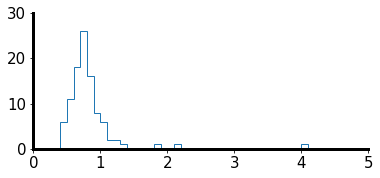

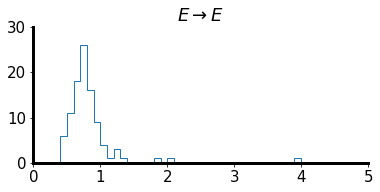

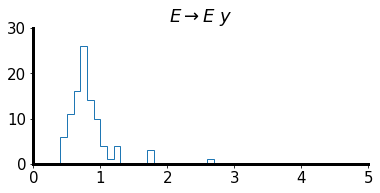

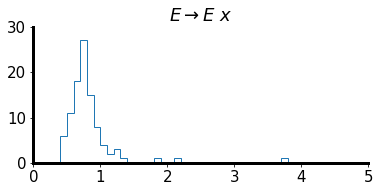

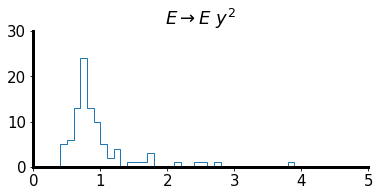

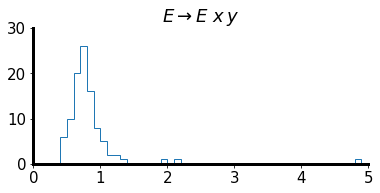

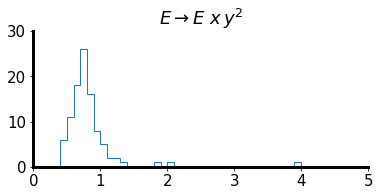

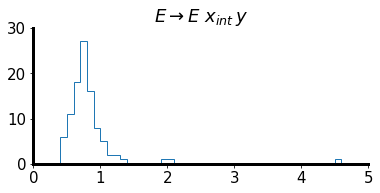

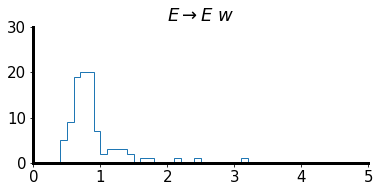

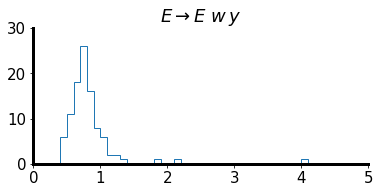

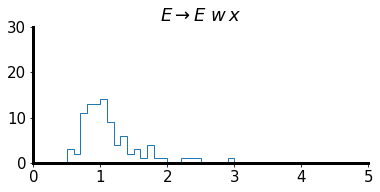

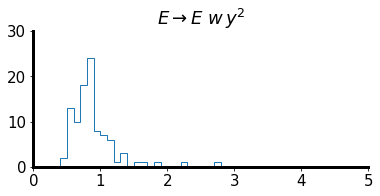

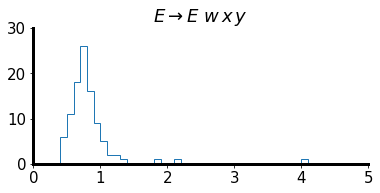

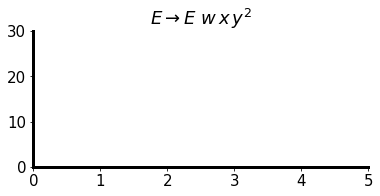

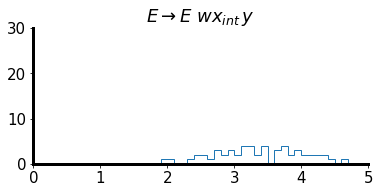

In [64]:
f = 'seq_syn_effects_tracked_batch_100_STD_EXPL_0.005_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_2023-01-24_11:04:28.047045'
plot_all(f, 14, 100)



0.7390710536518742
0.8193101880042972


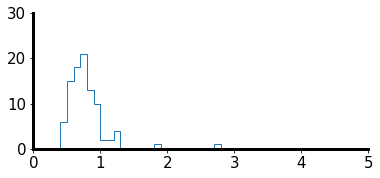

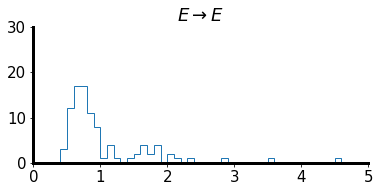

In [65]:
f = 'seq_syn_effects_tracked_batch_100_STD_EXPL_0.005_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_2023-01-24_14:28:30.664540'
plot_all(f, 14, 100)

In [233]:
def dropped_rule_loss_scatter_plots(file_name, n_plasticity_coefs, batch_size, start=0, yscale=None, n_categories=1, loss_yscale=None, xticklabels=None, scale=1):
    train_data_path = f'./sims_out/{file_name}/train_data.csv'
    
    df_train = read_csv(train_data_path, read_header=False)
    true_losses = df_train[df_train.columns[2:batch_size+2]][start:]

    true_losses = np.array(true_losses)
    
    if xticklabels is None:  
        xticklabels = ['None'] + list(rule_names[:14])
        
    cmap = matplotlib.cm.get_cmap('nipy_spectral')
    colors = [cmap(x) for x in np.linspace(0, 0.55, len(xticklabels))]
    np.random.shuffle(colors)
    
    fig, axs = plt.subplots(2, 1, figsize=(0.8 * len(xticklabels) * scale, 7))

    axs[0].spines['bottom'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['top'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)

    axs[0].set_xticks([])
    axs[1].set_ylim(0, 30)
    
    axs[1].set_xticklabels(xticklabels, rotation=60)
    axs[1].set_xticks(np.arange(0, len(xticklabels)))
        
    axs[0].set_yscale('log')
    
    lin_log_thresh = 3
    
    for i in range(true_losses.shape[0]):
        losses = true_losses[i]
        
        losses_over = losses[losses > lin_log_thresh]
        losses_under = losses[losses <= lin_log_thresh]
        
        axs[0].scatter(i + np.random.normal(0, 0.15, len(losses_over)), losses_over, s=12, facecolors='none', edgecolors=colors[i])
        axs[1].scatter(i + np.random.normal(0, 0.15, len(losses_under)), losses_under, s=12, facecolors='none', edgecolors=colors[i])
        
        median = np.median(losses)
        if median > lin_log_thresh:
            axs[0].plot([i - 0.4, i + 0.4], [median] * 2, lw=3, color='black')
        else:
            axs[1].plot([i - 0.4, i + 0.4], [median] * 2, lw=3, color='black')
    
    axs[1].set_ylim(0, lin_log_thresh)
    axs[0].set_ylim(lin_log_thresh, 20000)
    
    axs[0].set_xlim(-0.5, len(xticklabels) - 0.5)
    axs[1].set_xlim(-0.5, len(xticklabels) - 0.5)
    
    axs[1].set_ylabel('Loss')
    
    fig.tight_layout()
    
    return fig, axs
        
#         final_syn_effects.append(df_train[df_train.columns[i]][start:][x_best_min])
        
#     final_syn_effects = np.array(final_syn_effects)
        
#     axs[1].plot(x_mins[1:], losses[x_mins[1:]], color='black')
# #     axs[1].plot(x_test, losses_test, color='blue')
#     axs[1].set_ylim(0, 200)
#     axs[1].set_ylabel('Loss')
#     axs[1].set_xlabel('Epochs')

Text(0.5, -36.223823418122876, 'Dropped rule')

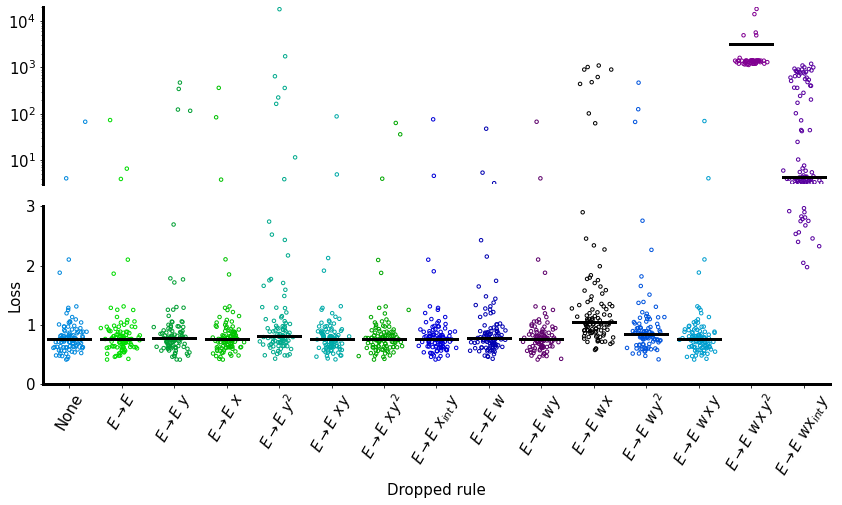

In [234]:
f = 'seq_syn_effects_tracked_batch_100_STD_EXPL_0.005_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_2023-01-24_11:04:28.047045'
fig, axs = dropped_rule_loss_scatter_plots(f, 14, 100)
axs[1].set_xlabel('Dropped rule')

Text(0.5, 11.59103465619139, 'Activations simulated')

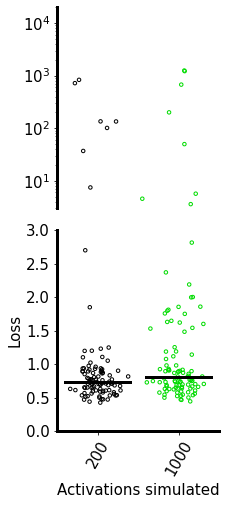

In [235]:
f = 'seq_syn_effects_tracked_batch_100_STD_EXPL_0.005_FIXED_True_L1_PENALTY_5e-07_5e-07_5e-07_2023-01-24_14:28:30.664540'
xticklabels = ['200', '1000']
fig, axs = dropped_rule_loss_scatter_plots(f, 14, 100, xticklabels=xticklabels, scale=2)
axs[1].set_xlabel('Activations simulated')